In [54]:
# Inspired by Stefanie Molin (added mapping)

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

First we load a dataset, which records meteorite landings. 

In [56]:
meteorites = pd.read_csv('../data/Meteorite_Landings.csv')

It holds the following data as a table:

In [58]:
meteorites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  object 
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 3.5+ MB


Let's look at the first few rows

In [60]:
meteorites.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


We want to get a visual overview, where these meteorites impacted the earth.
As a first step, we load a map of the earth and plot it.



<AxesSubplot:>

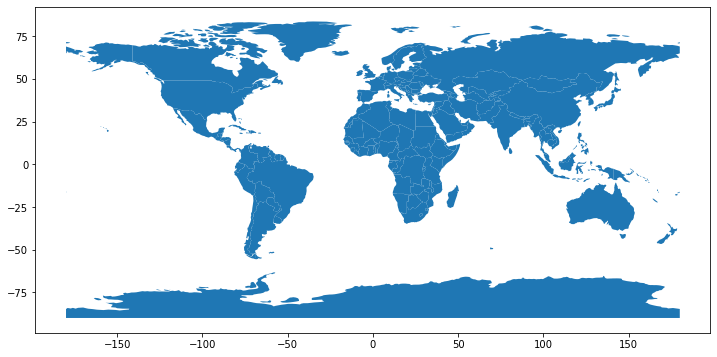

In [65]:
import geopandas

path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)
df.plot(figsize=(14, 6))

Using a library called *geopandas*, we can combine the information from the meteorite dataset such that the longitude and latitude information stored in the data is in correspondence with the latitude/longitude of the map we just loaded.

In [67]:
from shapely.geometry import Point

geom = [Point(xy) for xy in zip(meteorites.reclong, meteorites.reclat)]
geomdf = geopandas.GeoDataFrame(meteorites, geometry=geom)


Visualizing the data together, yields a much more vivid picture of what happend. In particular, looking at the pattern, there are (hopefully) many questions that directly pop into our mind, which would never occur to us if we had justed starred at the raw data. 

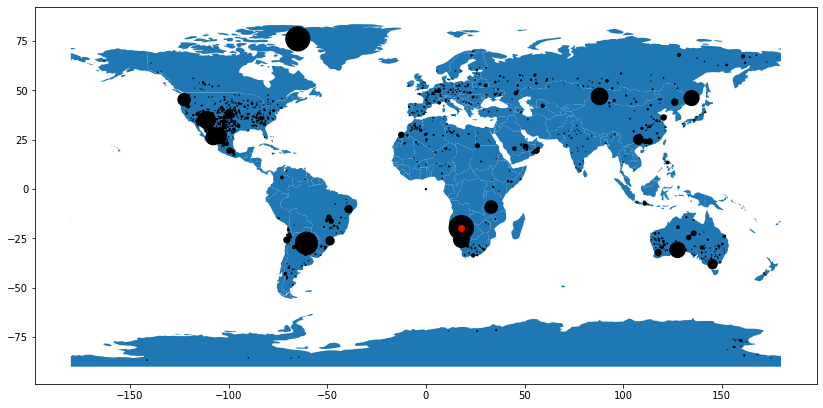

In [69]:


ax = df.plot(figsize=(14, 10))
large_idx = meteorites["mass (g)"] >= 10000
geomdf[large_idx].plot(ax=ax, color='k', markersize=meteorites["mass (g)"][large_idx]/100000)

largest = geomdf.iloc[meteorites["mass (g)"].argmax()]
plt.scatter(largest.reclong, largest.reclat, color='r')

